# Viscoelasity - Simple RNN

## Imports

In [1]:
import seaborn as sns
import datetime
now = datetime.datetime.now

from keras import optimizers
from keras import losses
from matplotlib import pyplot as plt

# plt.rcParams['text.usetex'] = True
sns.set_style('darkgrid')

2025-01-31 12:32:57.118552: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 12:32:57.122747: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 12:32:57.135553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738323177.156702   40055 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738323177.163876   40055 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 12:32:57.186344: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
from src.plots import plot_data, plot_model_pred, plot_loss
from src.data import generate_data_harmonic, generate_data_relaxation
from src.models import RNNModel 

## Plot Data

2025-01-31 12:32:59.177454: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


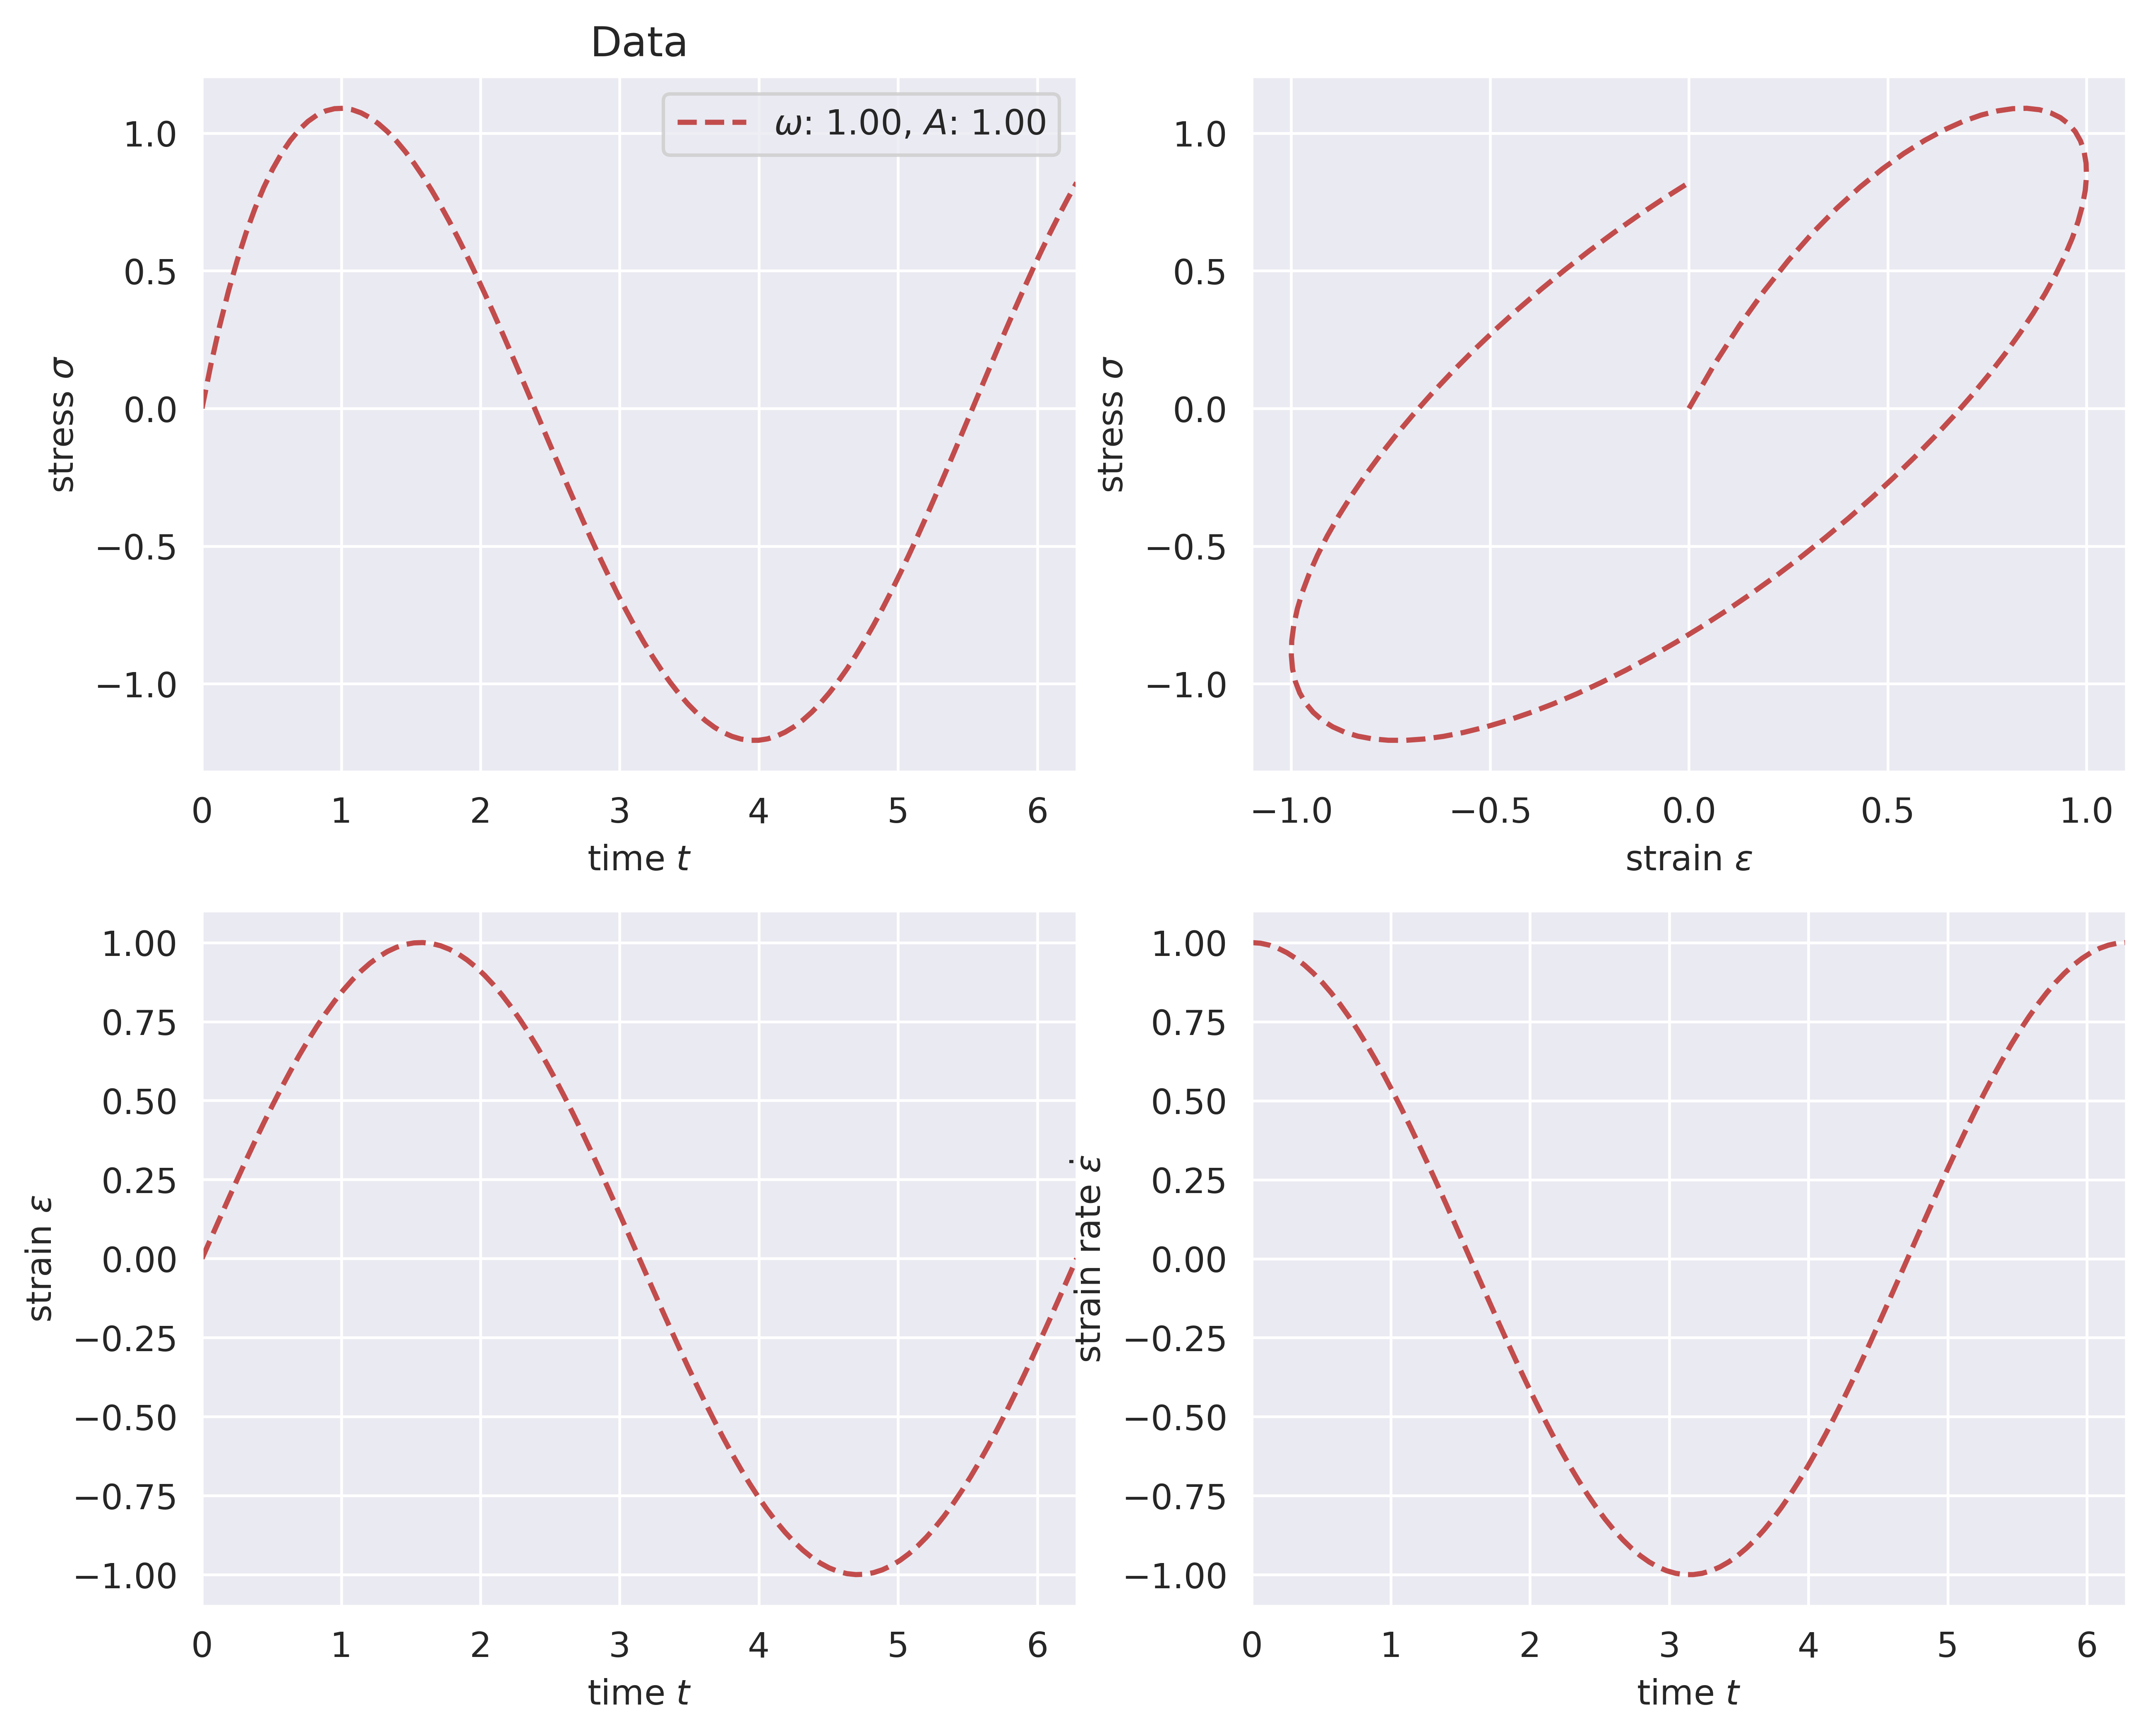

In [3]:
E_infty = 0.5
E = 2
eta = 1

n = 100
omegas = [1]
As = [1]

eps, eps_dot, sig, dts = generate_data_harmonic(E_infty, E, eta, n, omegas, As)
plot_data(eps, eps_dot, sig, omegas, As)

## Train Model

2025-01-31 12:33:00.796659
Epoch 1/100


/home/argo/envs/tf_env/lib/python3.11/site-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'rnn_cell', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1/1 - 1s - 1s/step - loss: 1.6032
Epoch 2/100
1/1 - 0s - 59ms/step - loss: 1.4965
Epoch 3/100
1/1 - 0s - 49ms/step - loss: 1.3979
Epoch 4/100
1/1 - 0s - 67ms/step - loss: 1.3071
Epoch 5/100
1/1 - 0s - 47ms/step - loss: 1.2236
Epoch 6/100
1/1 - 0s - 45ms/step - loss: 1.1472
Epoch 7/100
1/1 - 0s - 45ms/step - loss: 1.0774
Epoch 8/100
1/1 - 0s - 49ms/step - loss: 1.0137
Epoch 9/100
1/1 - 0s - 51ms/step - loss: 0.9560
Epoch 10/100
1/1 - 0s - 49ms/step - loss: 0.9040
Epoch 11/100
1/1 - 0s - 45ms/step - loss: 0.8577
Epoch 12/100
1/1 - 0s - 49ms/step - loss: 0.8169
Epoch 13/100
1/1 - 0s - 50ms/step - loss: 0.7814
Epoch 14/100
1/1 - 0s - 54ms/step - loss: 0.7510
Epoch 15/100
1/1 - 0s - 54ms/step - loss: 0.7255
Epoch 16/100
1/1 - 0s - 56ms/step - loss: 0.7045
Epoch 17/100
1/1 - 0s - 53ms/step - loss: 0.6877
Epoch 18/100
1/1 - 0s - 53ms/step - loss: 0.6746
Epoch 19/100
1/1 - 0s - 53ms/step - loss: 0.6647
Epoch 20/100
1/1 - 0s - 54ms/step - loss: 0.6574
Epoch 21/100
1/1 - 0s - 52ms/step - loss: 0

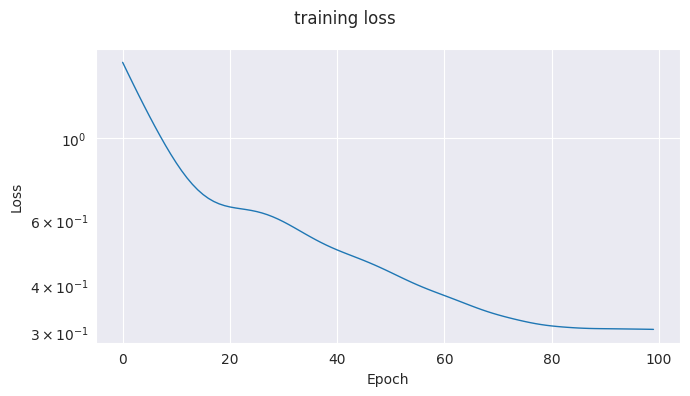

In [4]:
model = RNNModel([32, 2], ['softplus', 'linear'], [False, False])
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.002),
    loss=losses.MeanSquaredError()
)

t1 = now()
print(t1)
h = model.fit([eps, dts], [sig], epochs = 100,  verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')
plot_loss(h.history['loss'], suptitle='training loss')

## Plot Evaluation Data

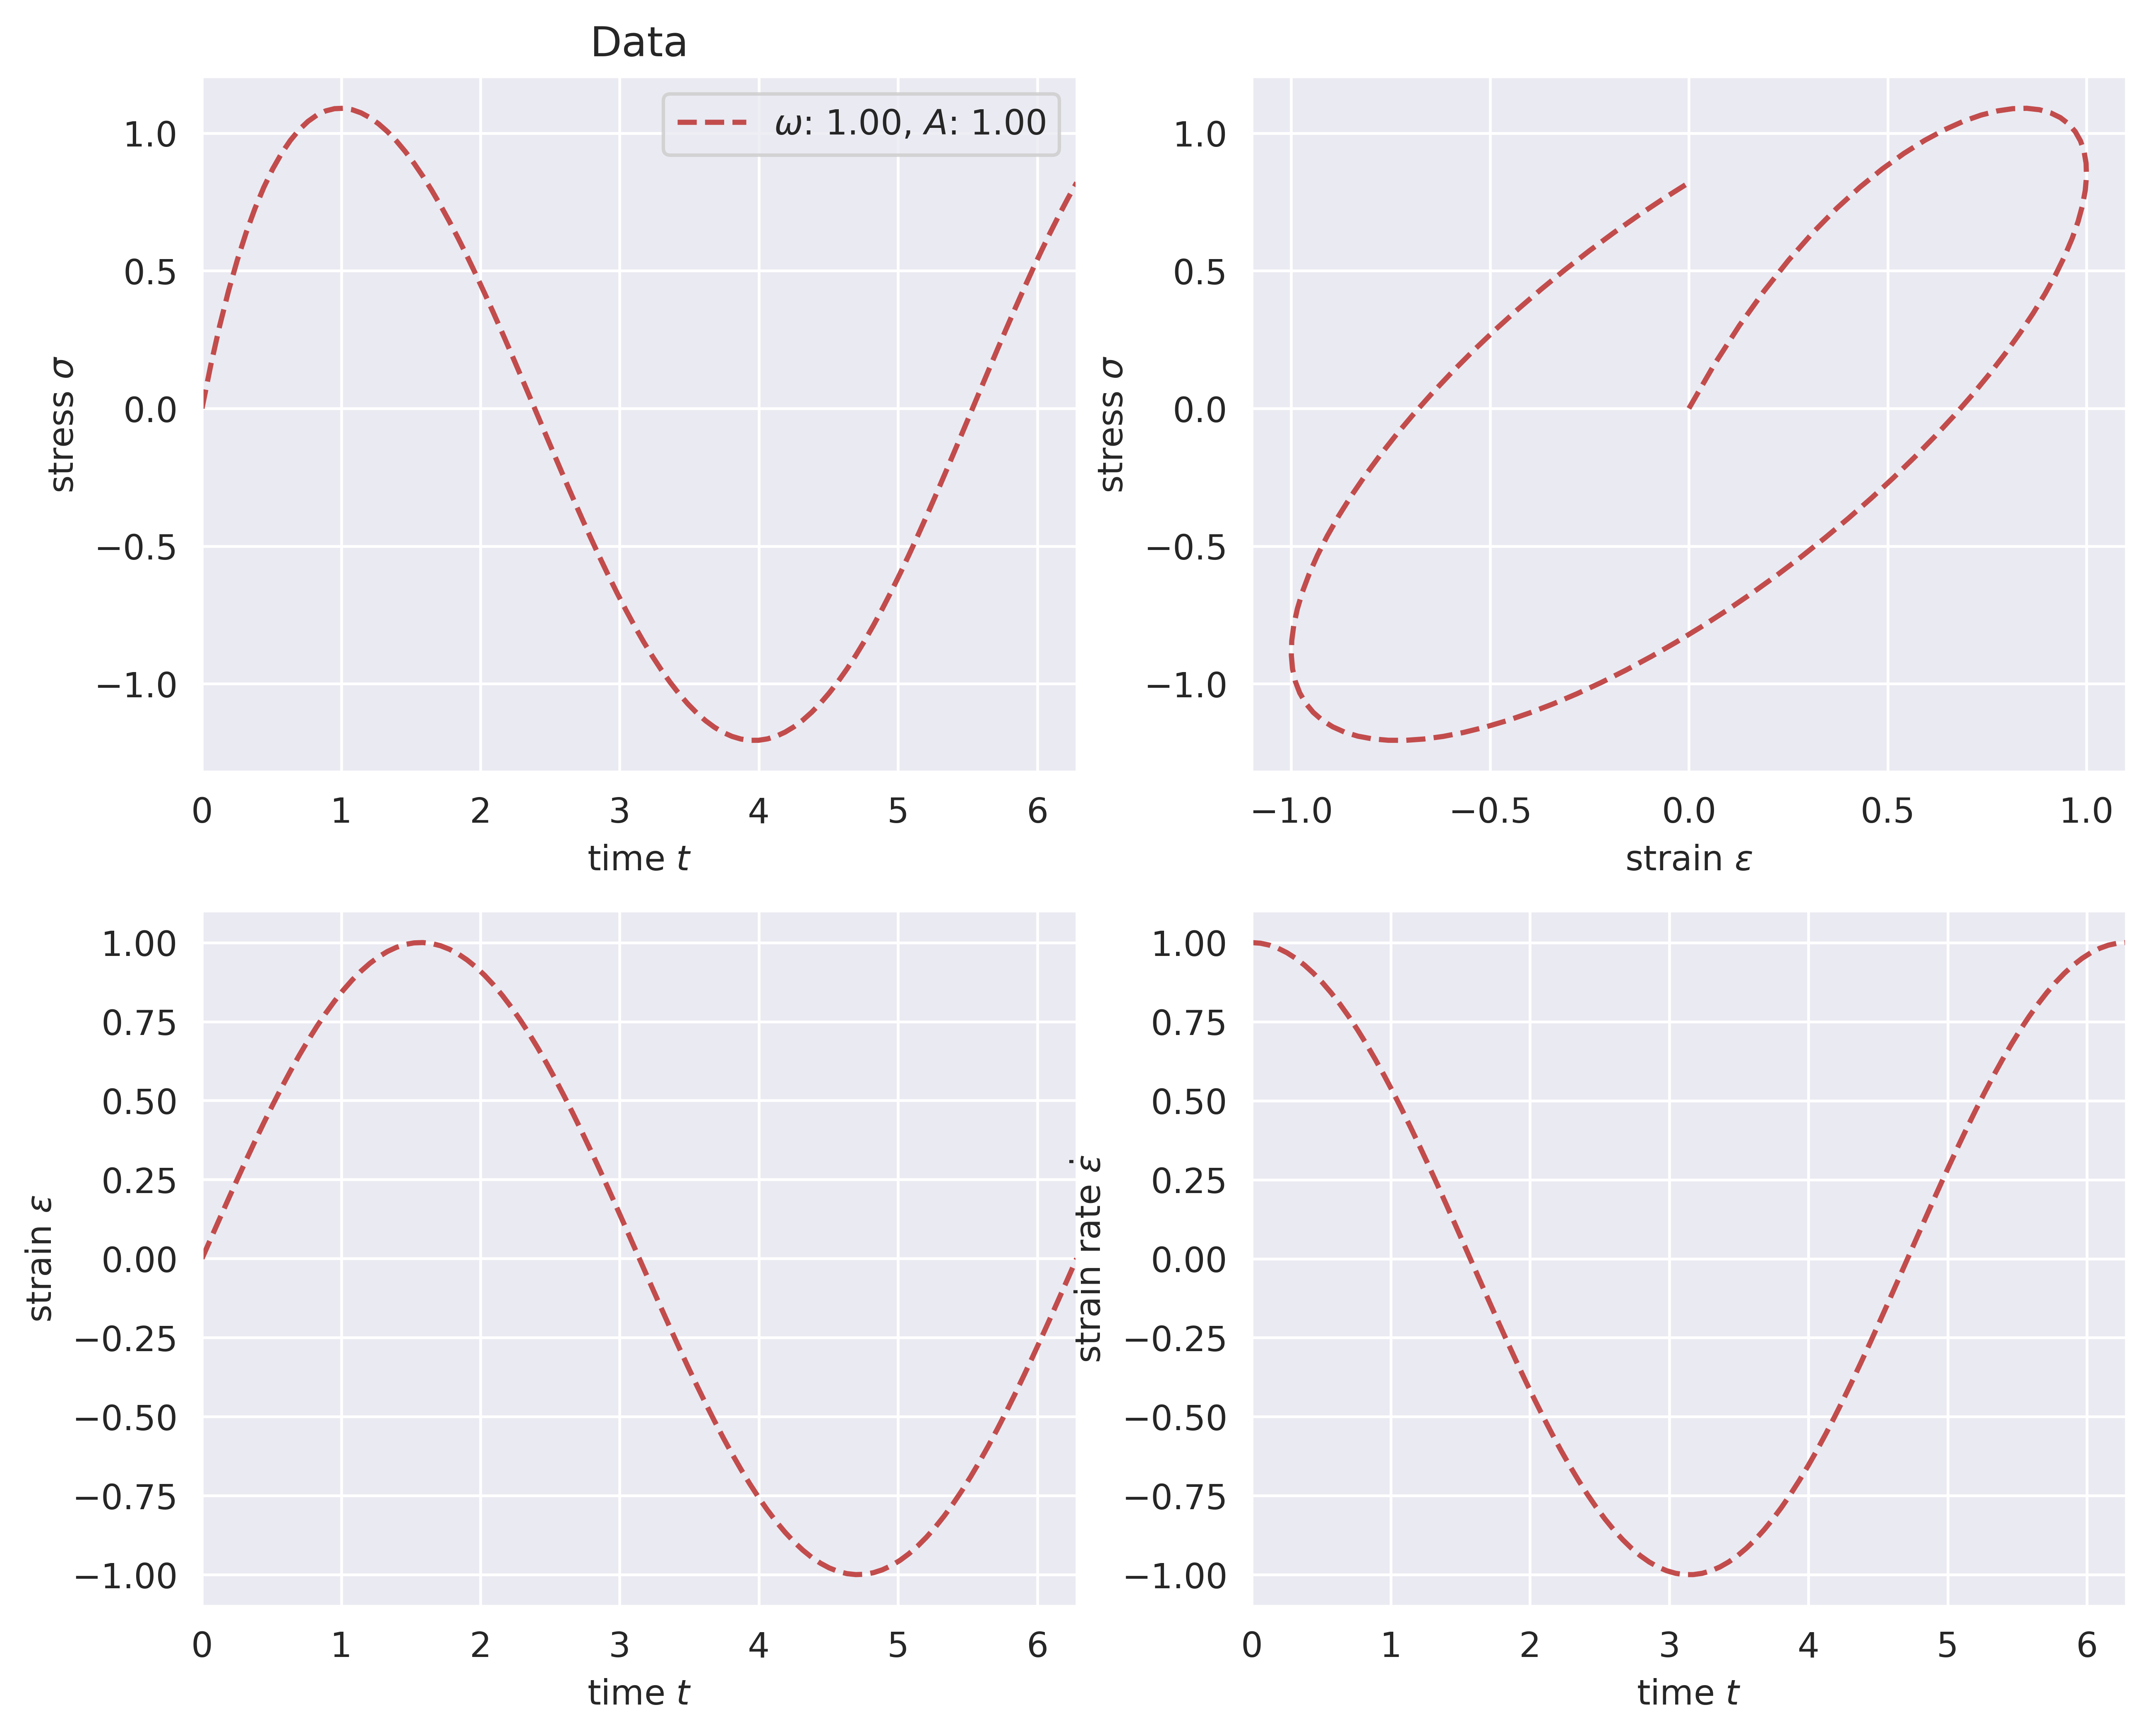

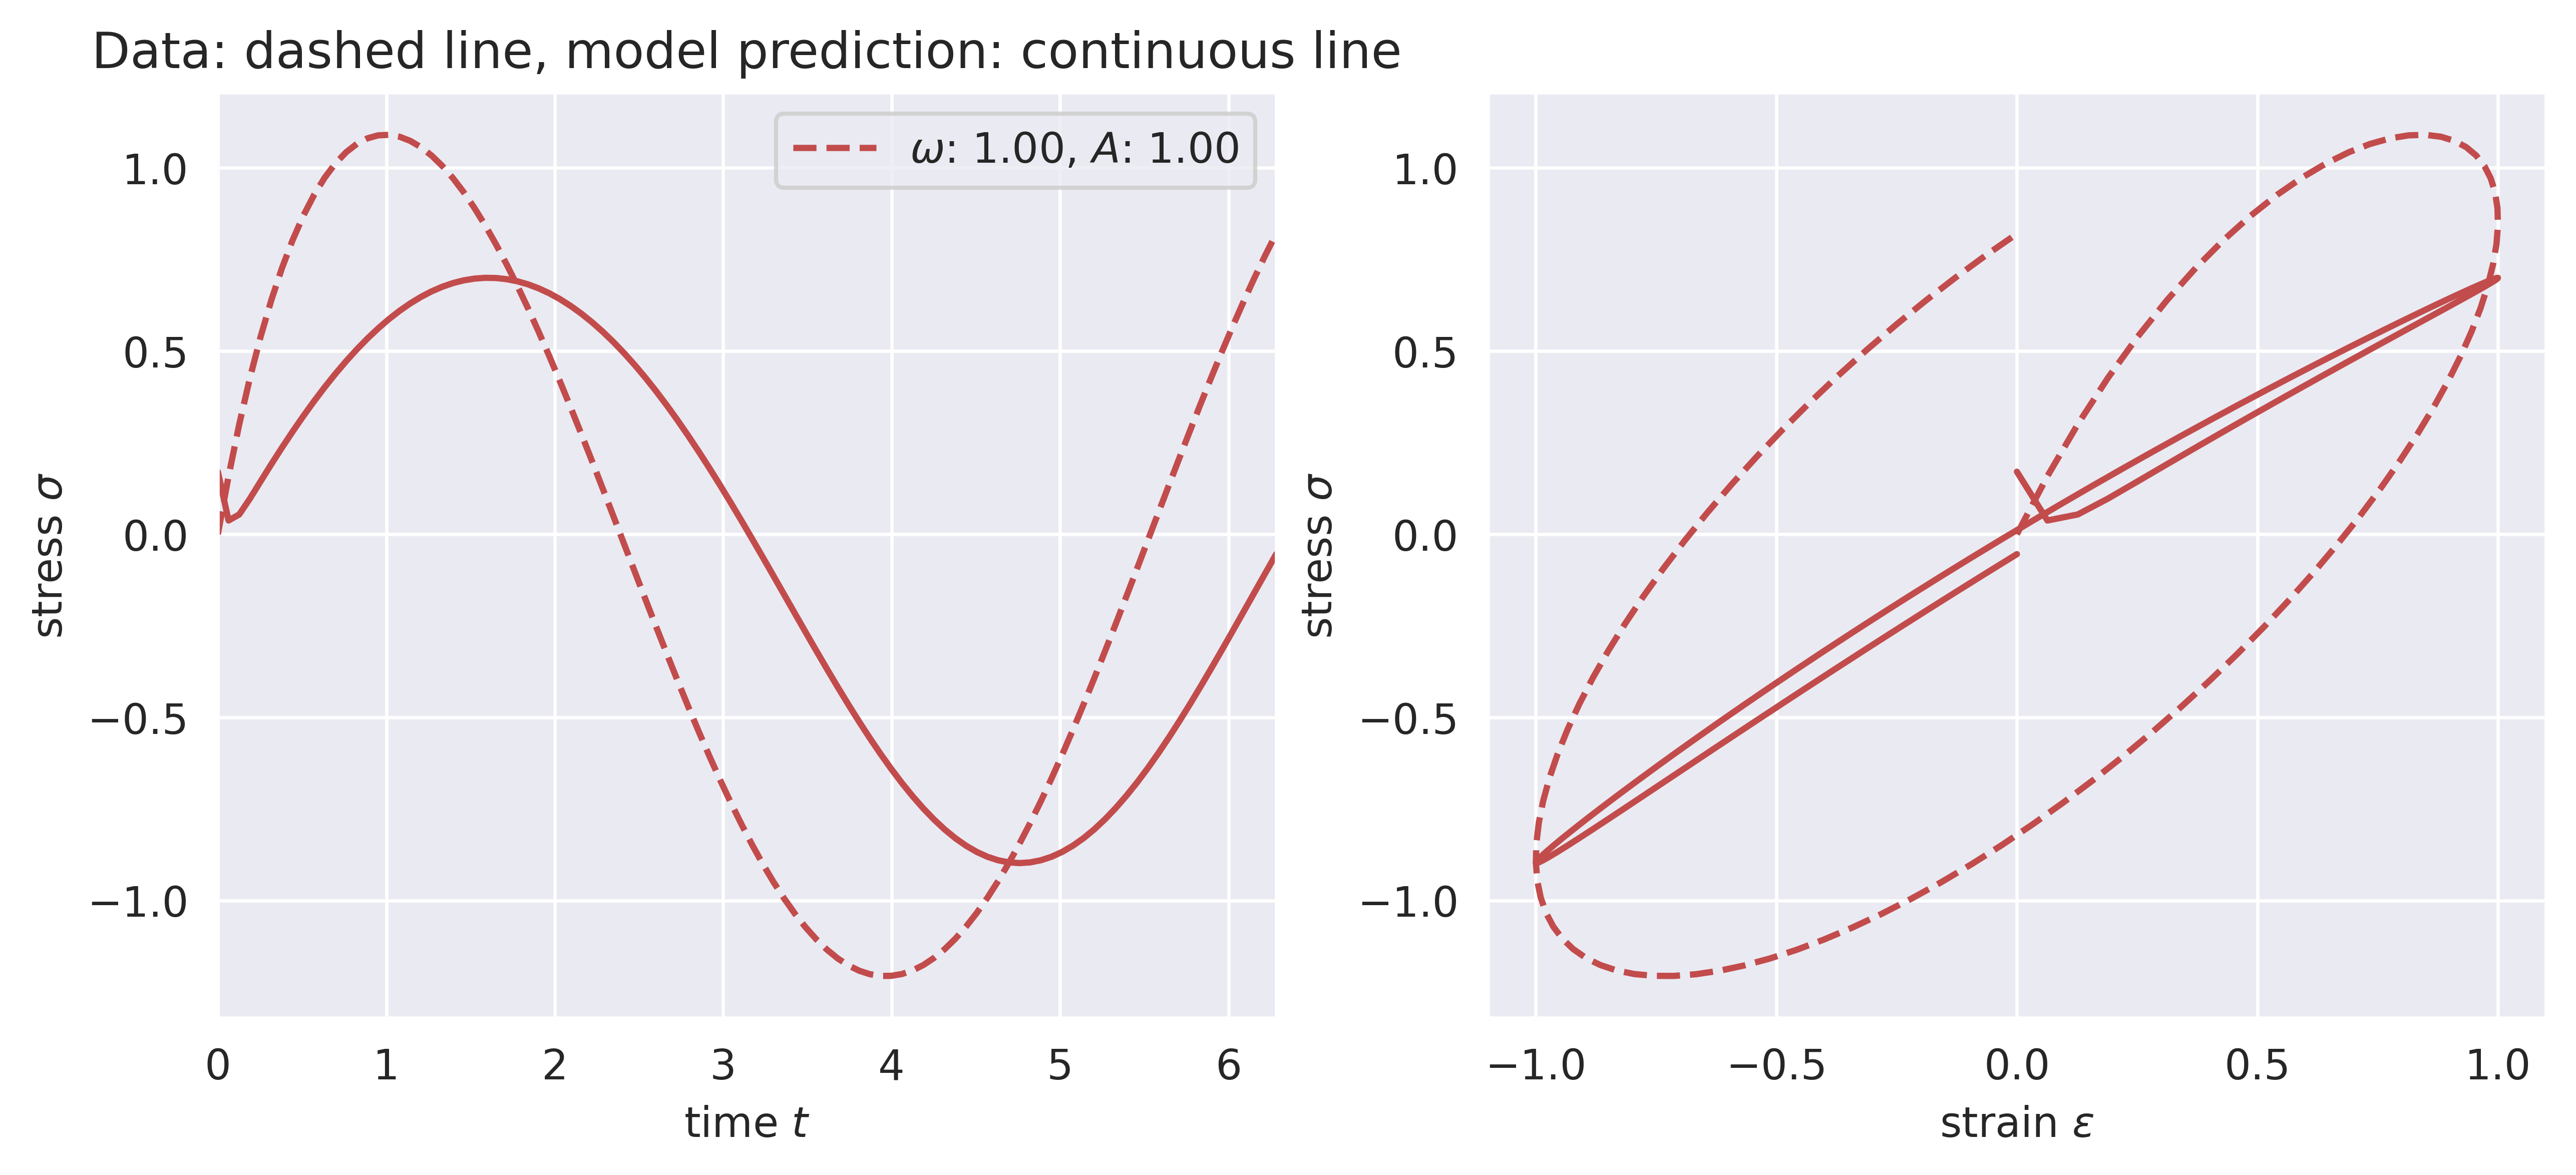

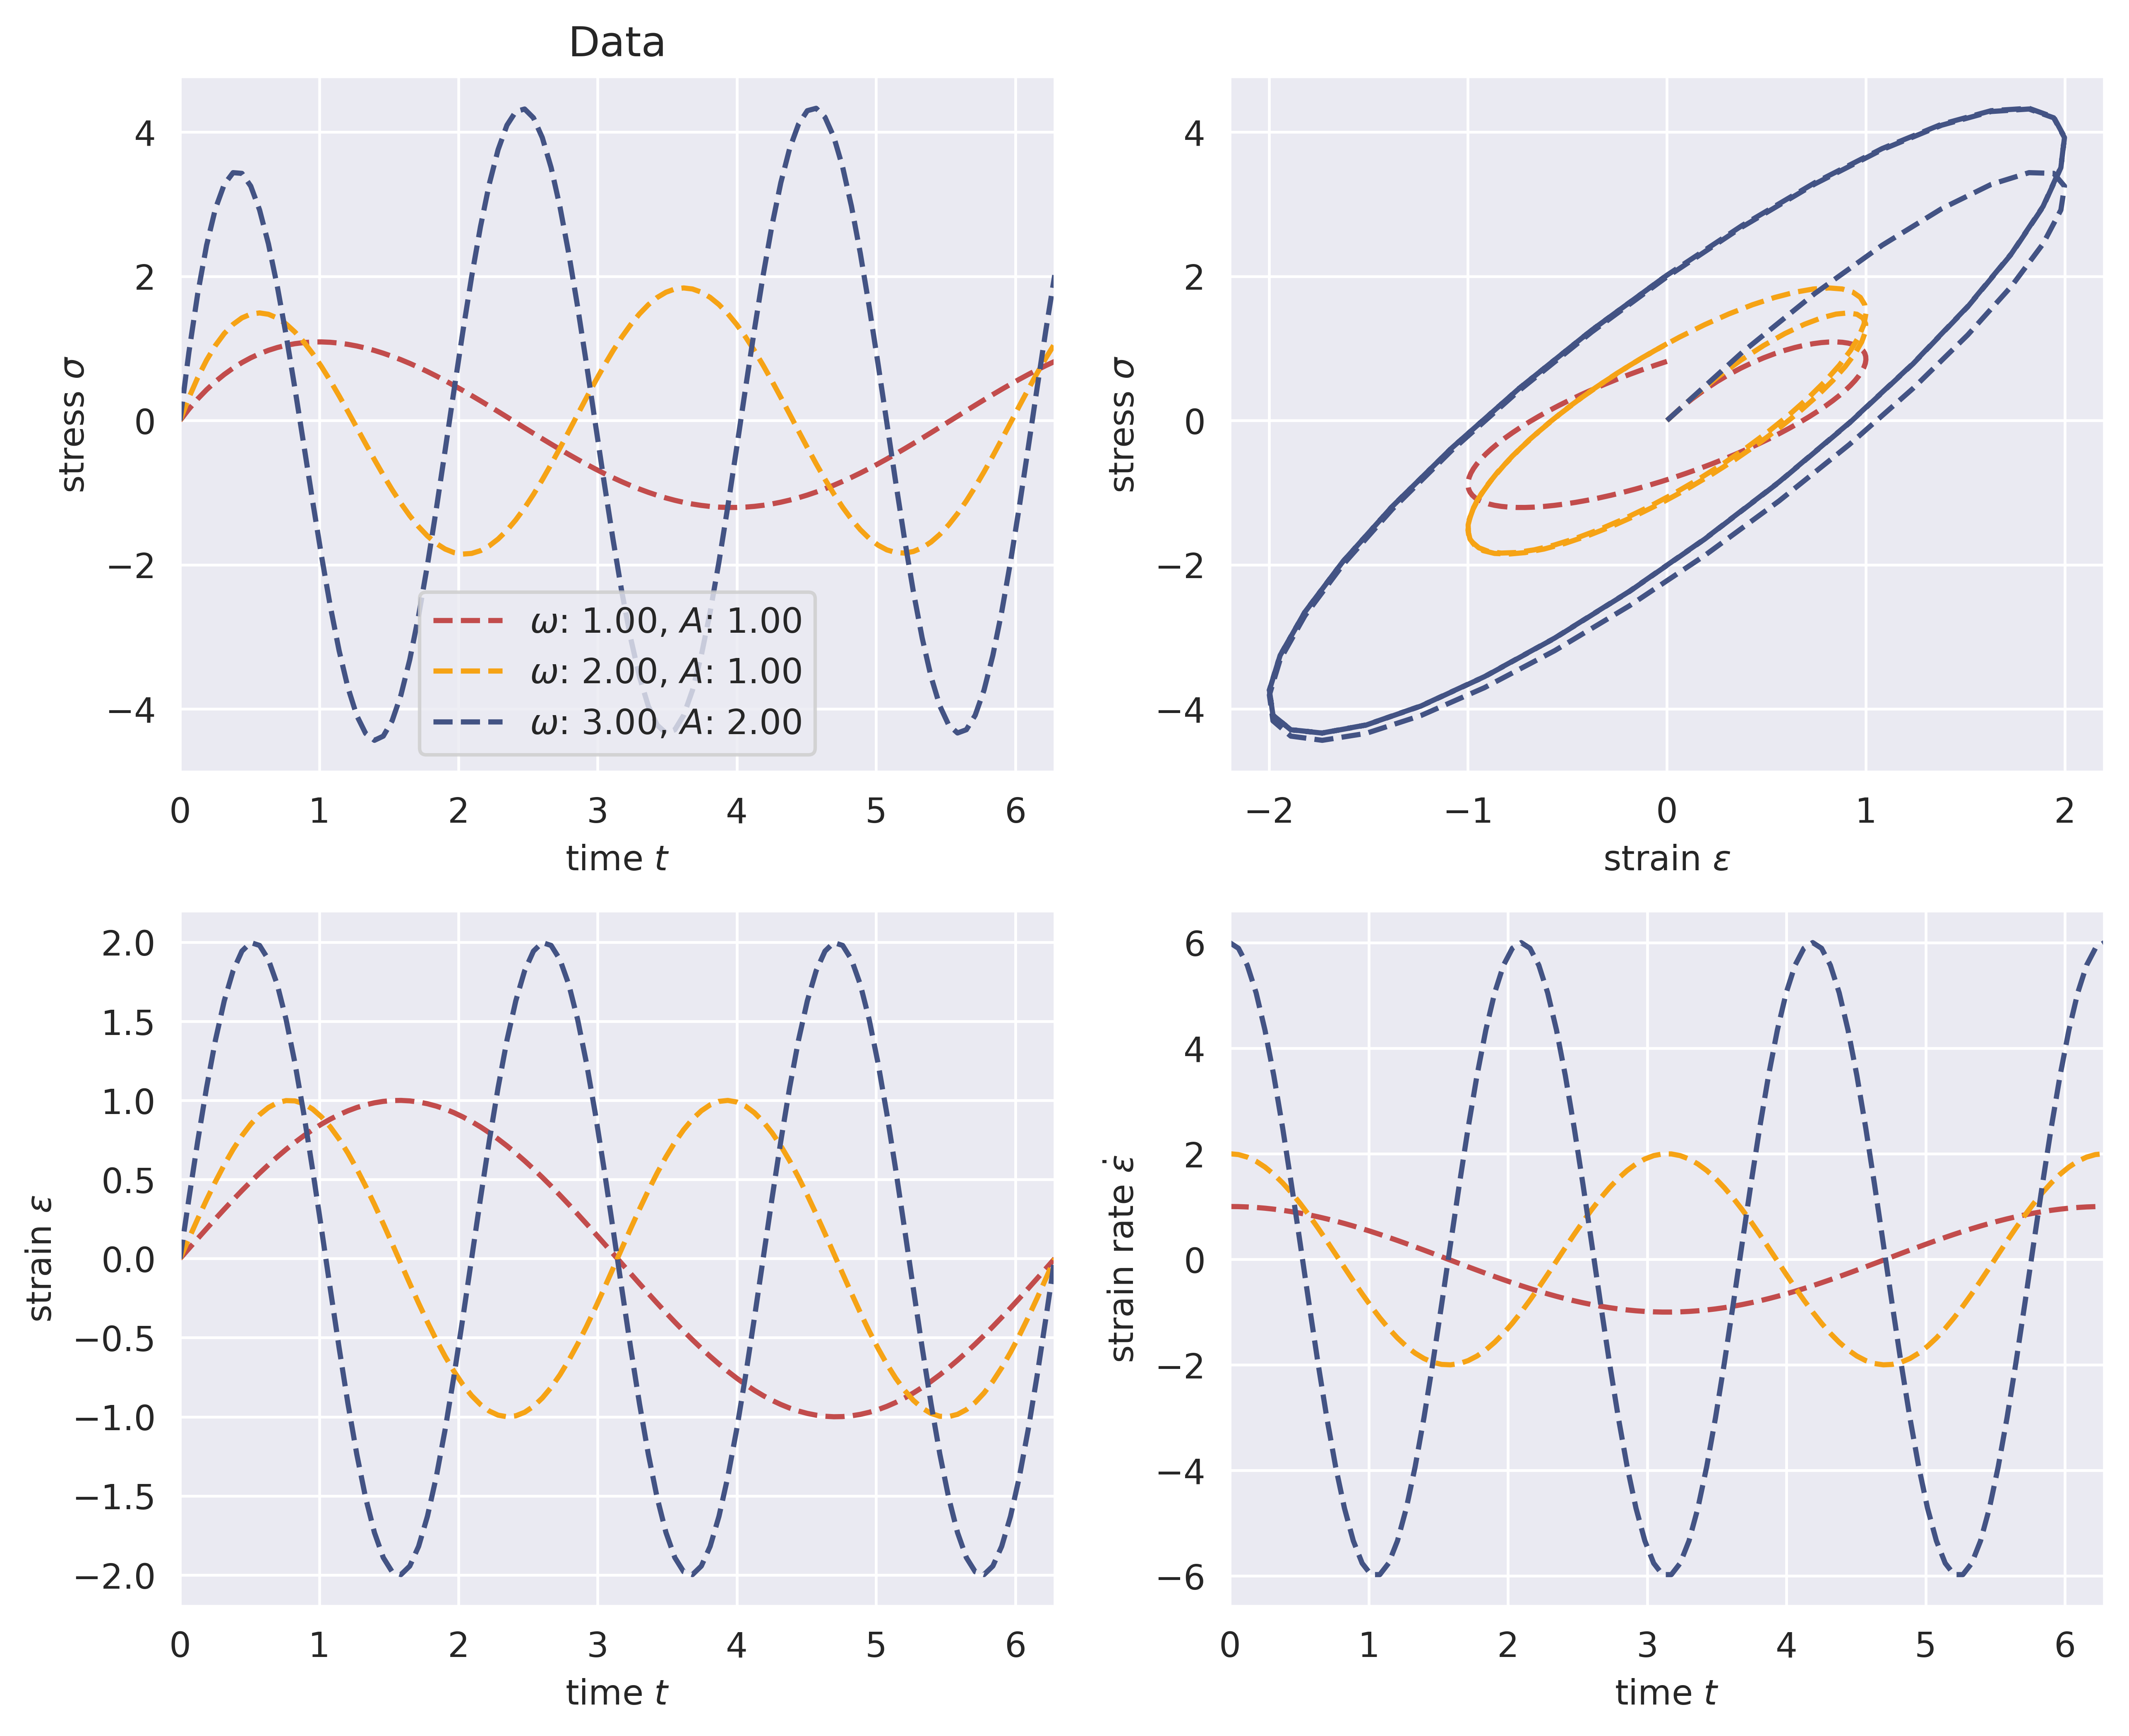

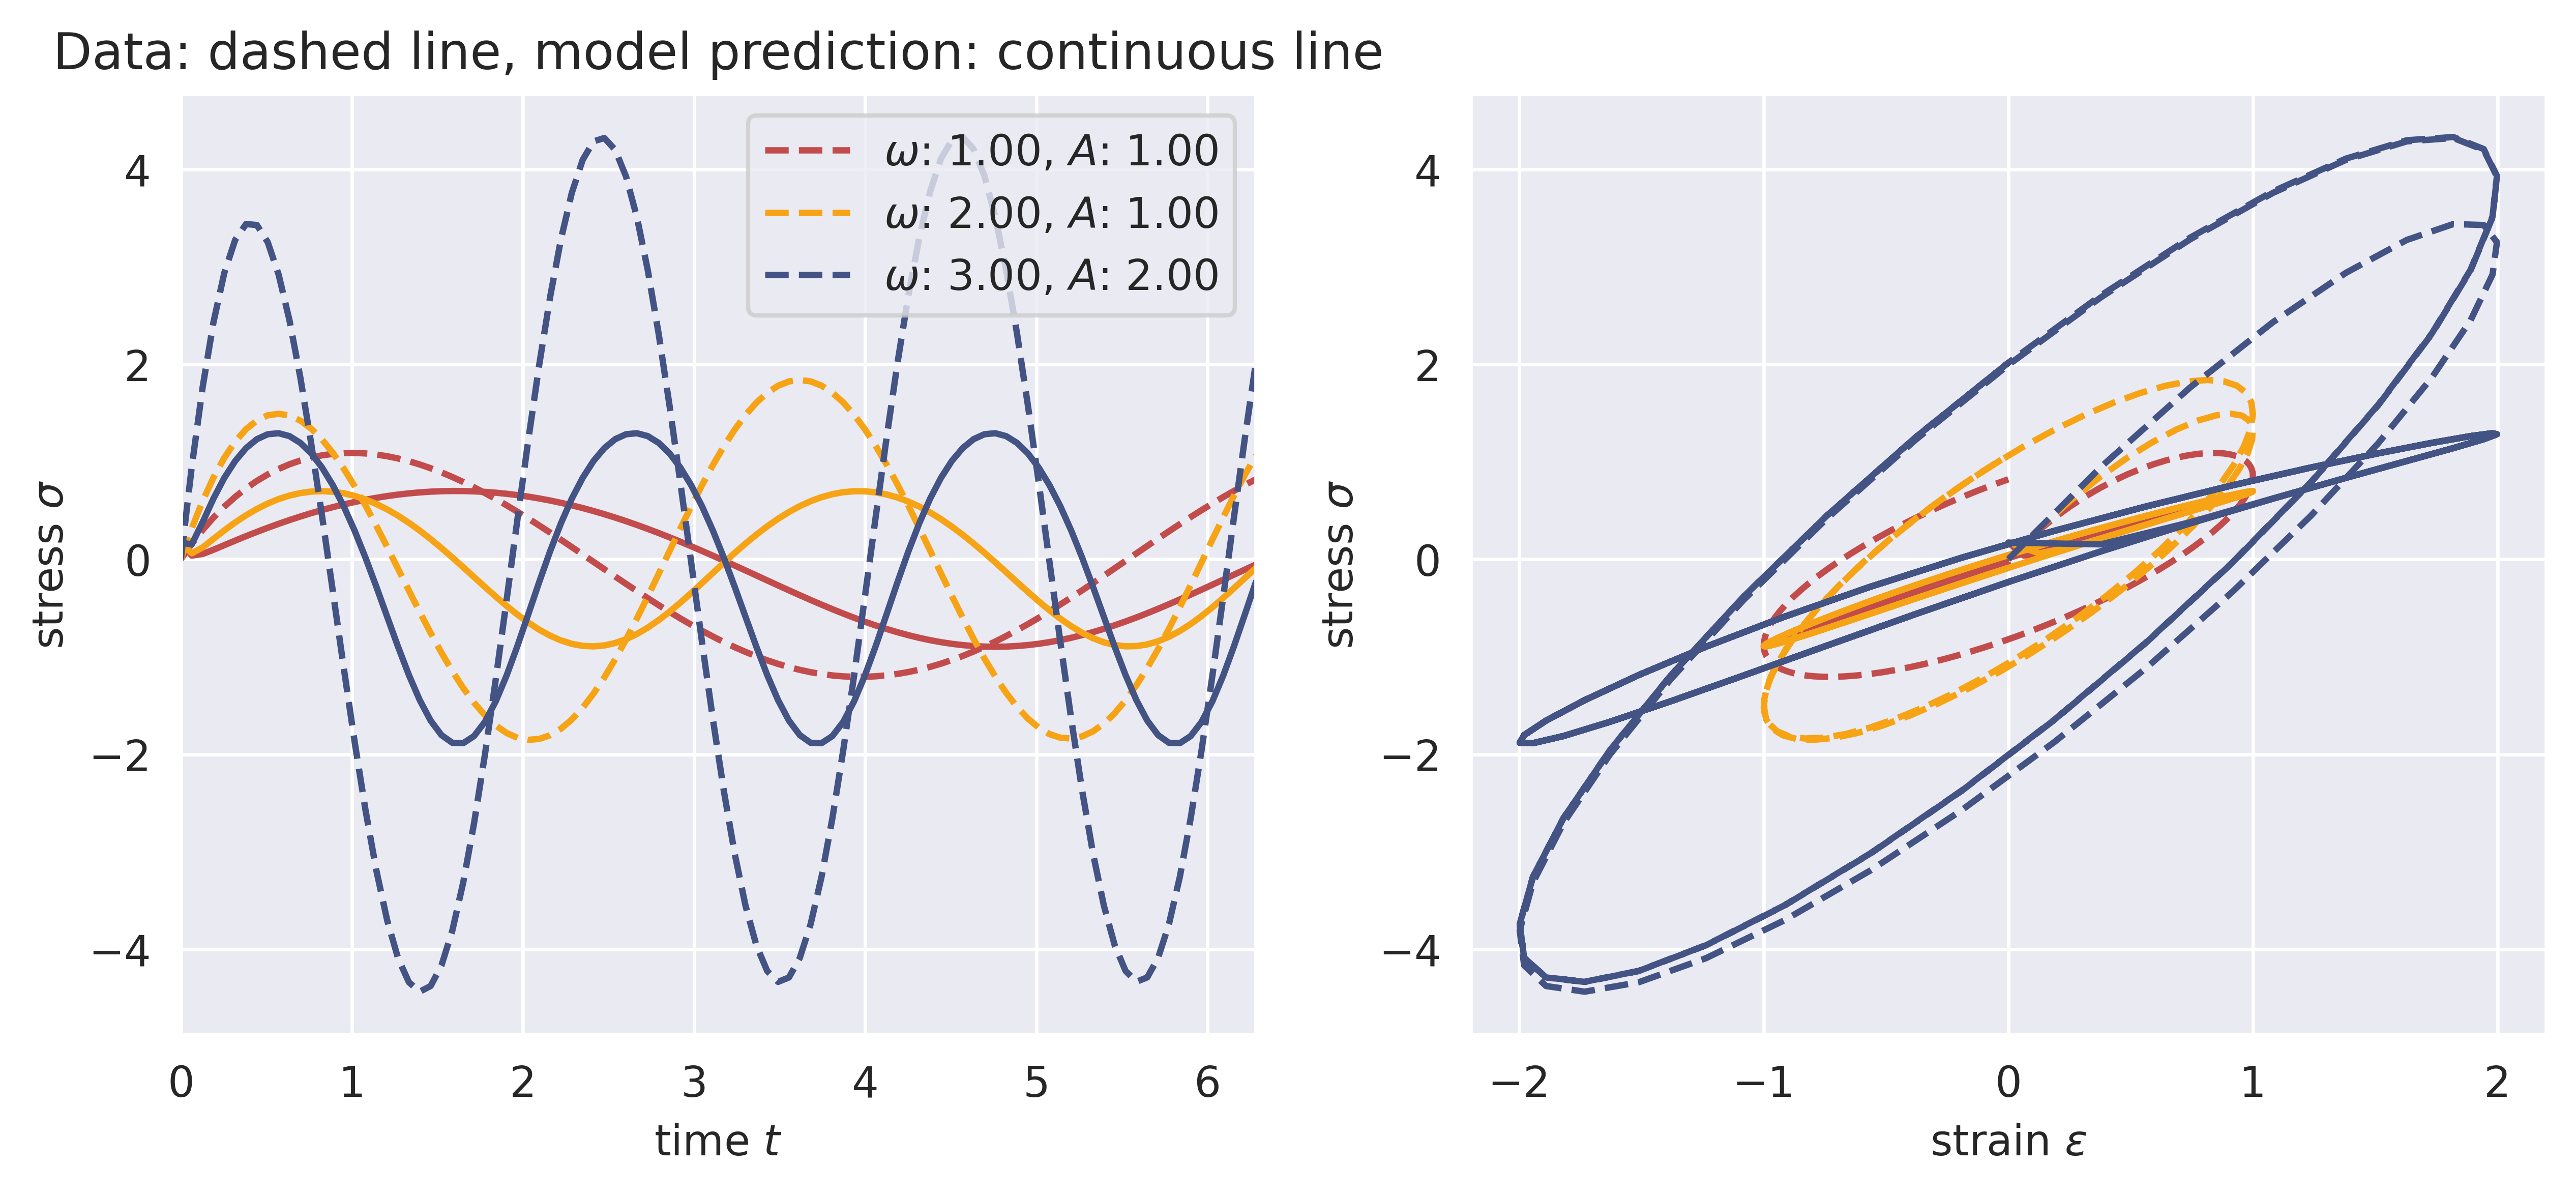

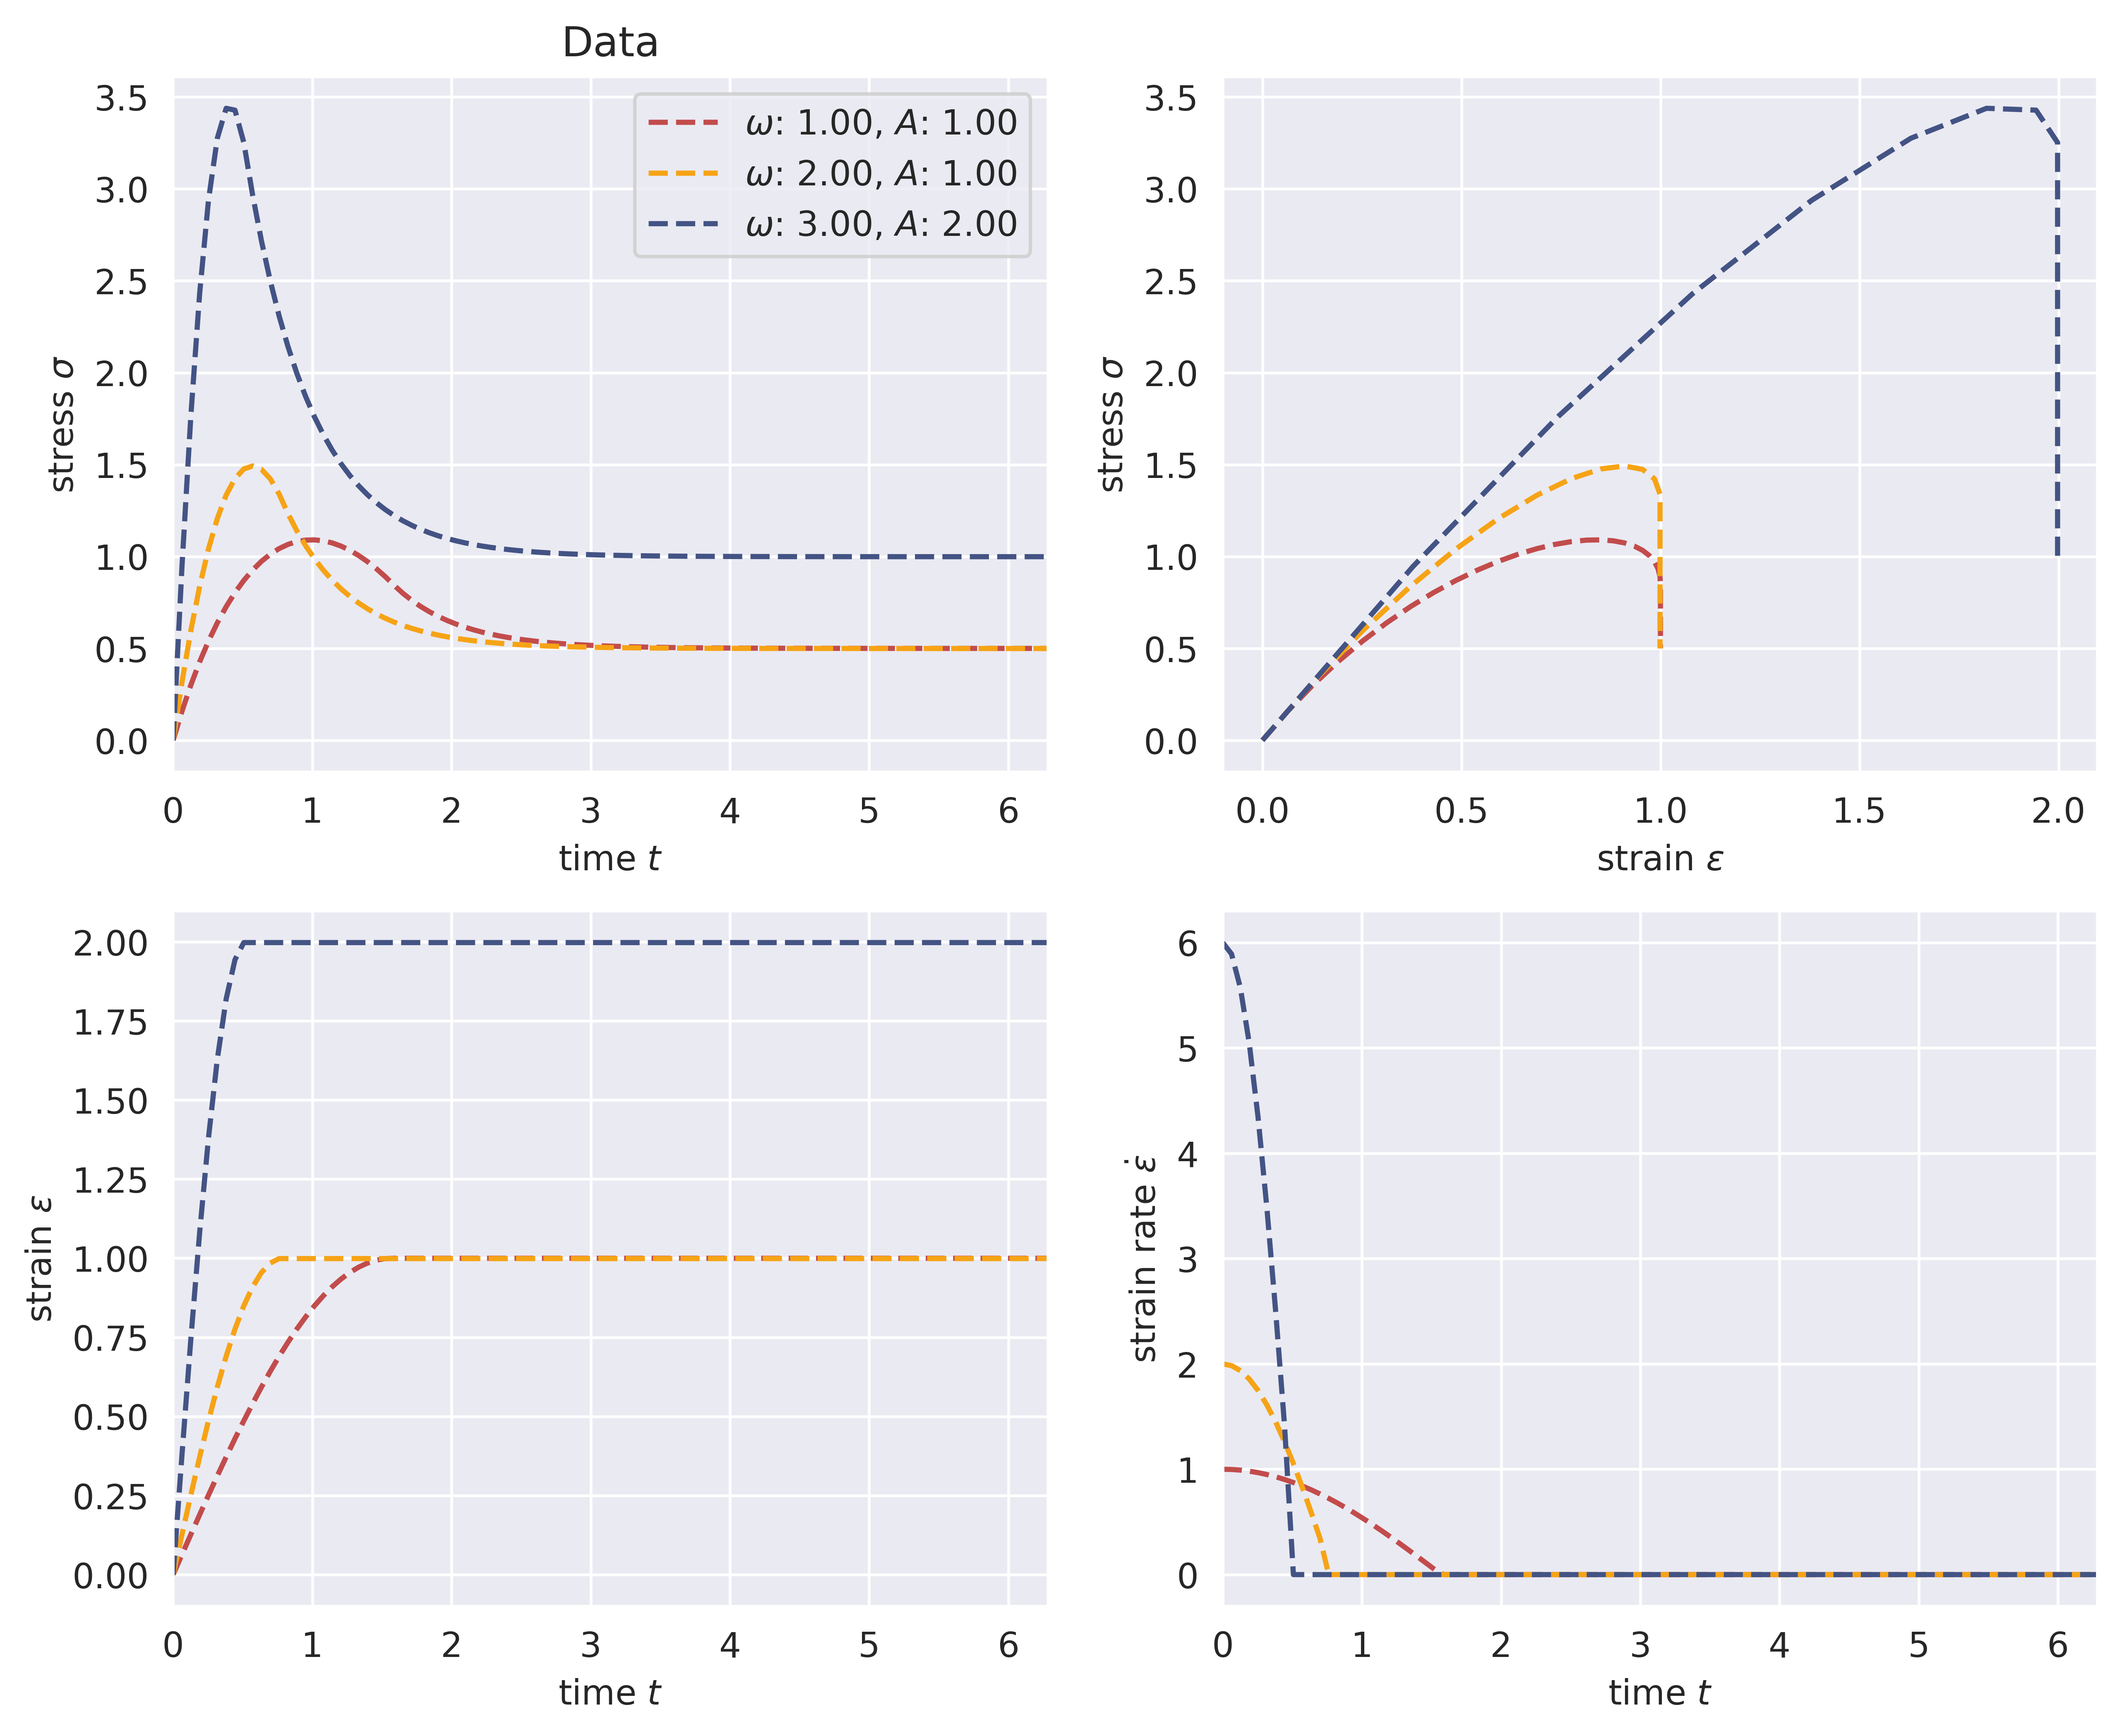

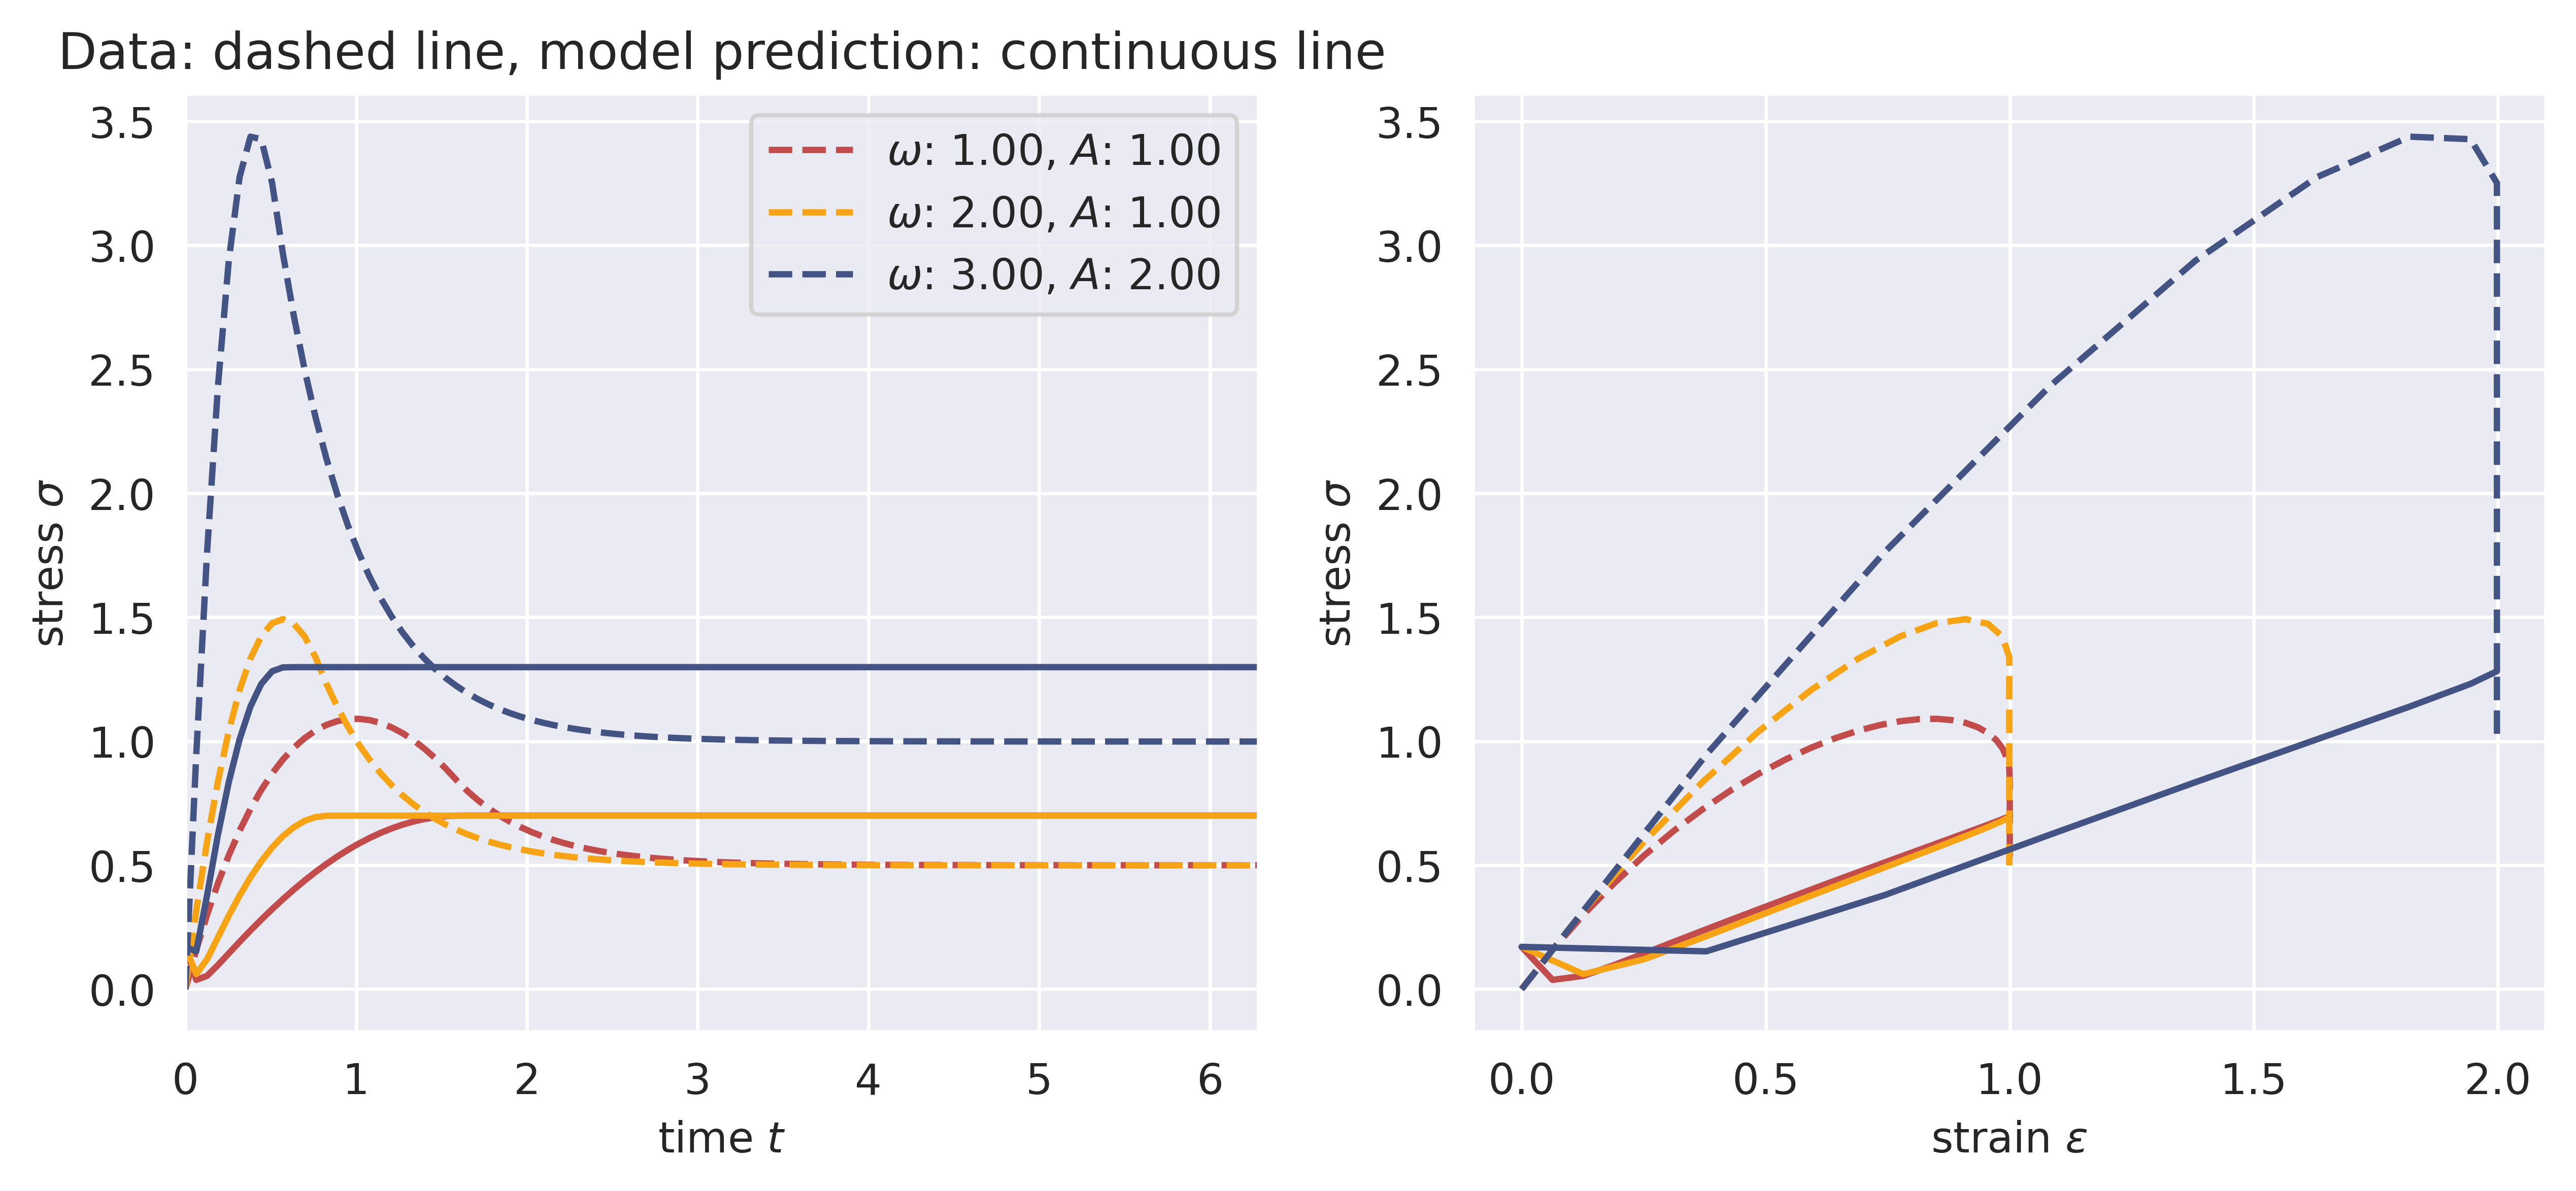

In [5]:
eps, eps_dot, sig, dts = generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model([eps, dts])
plot_data(eps, eps_dot, sig, omegas, As)
plot_model_pred(eps, sig, sig_m, omegas, As)

As = [1,1,2]
omegas = [1,2,3]

eps, eps_dot, sig, dts = generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model([eps, dts])
plot_data(eps, eps_dot, sig, omegas, As)
plot_model_pred(eps, sig, sig_m, omegas, As)


eps, eps_dot, sig, dts = generate_data_relaxation(E_infty, E, eta, n, omegas, As)
sig_m = model([eps, dts])
plot_data(eps, eps_dot, sig, omegas, As)
plot_model_pred(eps, sig, sig_m, omegas, As)